# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()#Your code here

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [2]:
df.columns = df.columns.str.replace("+","_")
df.columns = df.columns.str.replace("-","_")
df.columns = df.columns.str.replace(" ","_")
df.columns = df.columns.str.replace(".","_")
df.columns = df.columns.str.replace("®","")
df.columns = df.columns.str.replace("™","")
df.columns = df.columns.str.replace("'","")
df.columns = df.columns.str.replace("½","_5")
#Your code here - Manipulate column names

In [3]:
target = df['list_price']
features = df.drop('list_price', axis=1)#Your code here - Define the target and predictors
feature_list = features.columns

In [4]:
feature_list[:20]

Index(['piece_count', 'num_reviews', 'play_star_rating', 'star_rating',
       'val_star_rating', 'ages_10_', 'ages_10_14', 'ages_10_16', 'ages_10_21',
       'ages_11_16', 'ages_12_', 'ages_12_16', 'ages_14_', 'ages_16_',
       'ages_1_5_3', 'ages_1_5_5', 'ages_2_5', 'ages_4_', 'ages_4_7',
       'ages_4_99'],
      dtype='object')

In [5]:
train, test = train_test_split(df)

from statsmodels.formula.api import ols
outcome = "list_price"
x_cols = feature_list
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()
#Your code here - Fit the actual model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     551.7
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:56:21   Log-Likelihood:                -40498.
No. Observations:                8152   AIC:                         8.119e+04
Df Residuals:                    8057   BIC:                         8.185e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.4915      1.740     37.062      0.000      61.080      67.903
piece_count                                         76.0243      0.902     84.317      0.000      74.257      77.792
num_reviews                                          6.4957      0.688      9.436      0.000       5.146       7.845
play_star_rating                                     5.2490      0.628      8.364      0.000       4.019       6.479
star_rating                                         -1.6864      0.716     -2.355      0.019      -3.090      -0.283
val_star_rating                                     -8.2146      0.632    -12.998      0.000      -9.453      -6.976
ages_10_                                           119.3939      6.659     17.930      0.000     106.340     132.447
ages_10_14                                         -23.0161     10.125     -2.273      0.023     -42.864      -3.168
ages_10_16                                         -11.5381      3.960     -2.914      0.004     -19.301      -3.775
ages_10_21                                          62.7126      7.540      8.318      0.000      47.933      77.492
ages_11_16                                         -18.3569      5.916     -3.103      0.002     -29.954      -6.760
ages_12_                                            74.7788      5.770     12.959      0.000      63.468      86.090
ages_12_16                                         -61.5036      7.342     -8.377      0.000     -75.896     -47.111
ages_14_                                            24.6791      4.135      5.968      0.000      16.573      32.785
ages_16_                                            25.6882      6.232      4.122      0.000      13.472      37.905
ages_1_5_3                                          -9.4732      2.380     -3.980      0.000     -14.139      -4.808
ages_1_5_5                                          -3.9353      3.021     -1.303      0.193      -9.856       1.986
ages_2_5                                            15.0390      1.677      8.969      0.000      11.752      18.326
ages_4_                                            -18.8963      6.672     -2.832      0.005     -31.976      -5.817
ages_4_7                                            -6.2969      3.178     -1.982      0.048     -12.526      -0.068
ages_4_99                                           -3.2850      3.771     -0.871      0.384     -10.676       4.106
ages_5_                                            -10.0036      3.012     -3.321      0.001     -15.908      -4.099
ages_5_12                                          -35.4136      3.107    -11.398      0.000     -41.504     -29.323
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [6]:
summary = model.summary()
p_table = summary.tables[1]
#Your code here - Remove features which do not appear to be statistically relevant

In [7]:
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table.rename(columns={"P>|t|":"p_val"}, inplace=True)
p_table = p_table.drop([0,1])
p_table.p_val =p_table.p_val.astype(float)

In [8]:
p_table = p_table.query("p_val < .05")
new_features = list(p_table[""])

In [9]:
outcome = "list_price"
x_cols = feature_list
predictors = '+'.join(new_features)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()#Your code here - Refit the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     720.7
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:56:22   Log-Likelihood:                -40506.
No. Observations:                8152   AIC:                         8.116e+04
Df Residuals:                    8079   BIC:                         8.167e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           66.3249      2.285     29.033      0.000      61.847      70.803
piece_count                                         76.1017      0.885     86.024      0.000      74.368      77.836
num_reviews                                          6.5934      0.682      9.671      0.000       5.257       7.930
play_star_rating                                     5.2900      0.612      8.640      0.000       4.090       6.490
star_rating                                         -1.6247      0.702     -2.316      0.021      -3.000      -0.250
val_star_rating                                     -8.2144      0.605    -13.583      0.000      -9.400      -7.029
ages_10_                                           124.1593      7.601     16.334      0.000     109.259     139.060
ages_10_14                                         -19.5986     10.621     -1.845      0.065     -40.419       1.221
ages_10_16                                          -8.7899      4.120     -2.133      0.033     -16.866      -0.713
ages_10_21                                          67.5184      8.319      8.117      0.000      51.212      83.825
ages_11_16                                         -16.5844      5.978     -2.774      0.006     -28.303      -4.866
ages_12_                                            78.7954      6.835     11.529      0.000      65.398      92.193
ages_12_16                                         -57.3786      7.806     -7.350      0.000     -72.681     -42.077
ages_14_                                            28.4682      4.961      5.739      0.000      18.744      38.193
ages_16_                                            28.5558      7.065      4.042      0.000      14.707      42.405
ages_1_5_3                                          -5.5748      3.495     -1.595      0.111     -12.425       1.275
ages_2_5                                            18.8482      2.596      7.259      0.000      13.758      23.938
ages_4_                                            -16.0631     10.198     -1.575      0.115     -36.053       3.927
ages_4_7                                            -4.0263      2.737     -1.471      0.141      -9.392       1.339
ages_5_                                             -8.9701      3.070     -2.922      0.003     -14.987      -2.953
ages_5_12                                          -31.5394      3.118    -10.115      0.000     -37.652     -25.427
ages_6_                                            -23.3835      5.653     -4.137      0.000     -34.464     -12.303
ages_6_12                                          -17.8099      2.472     -7.204      0.000     -22.656     -12.964
ages_7_12                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [10]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table.rename(columns={"P>|t|":"p_val"}, inplace=True)
p_table = p_table.drop([0,1])
p_table.p_val =p_table.p_val.astype(float)
p_table = p_table.query("p_val < .05")
new_features = list(p_table[""])
outcome = "list_price"
x_cols = new_features
predictors = '+'.join(new_features)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()#Your code here - Continue to refine the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     797.1
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:56:22   Log-Likelihood:                -40514.
No. Observations:                8152   AIC:                         8.116e+04
Df Residuals:                    8086   BIC:                         8.162e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.7821      1.389     45.918      0.000      61.059      66.505
piece_count                                         76.1620      0.884     86.144      0.000      74.429      77.895
num_reviews                                          6.1198      0.634      9.648      0.000       4.876       7.363
play_star_rating                                     5.4756      0.609      8.993      0.000       4.282       6.669
star_rating                                         -1.6495      0.697     -2.365      0.018      -3.016      -0.283
val_star_rating                                     -8.3354      0.600    -13.883      0.000      -9.512      -7.158
ages_10_                                           126.7176      7.465     16.974      0.000     112.084     141.351
ages_10_16                                          -4.9318      3.718     -1.326      0.185     -12.220       2.357
ages_10_21                                          69.5385      8.212      8.468      0.000      53.440      85.637
ages_11_16                                         -12.7549      5.723     -2.229      0.026     -23.974      -1.536
ages_12_                                            82.3171      6.695     12.296      0.000      69.194      95.440
ages_12_16                                         -52.8939      7.611     -6.949      0.000     -67.814     -37.973
ages_14_                                            35.2518      4.409      7.996      0.000      26.610      43.894
ages_16_                                            33.9117      6.861      4.943      0.000      20.463      47.361
ages_2_5                                            22.0778      1.877     11.761      0.000      18.398      25.758
ages_5_                                             -7.3027      2.942     -2.482      0.013     -13.070      -1.535
ages_5_12                                          -28.3060      2.586    -10.947      0.000     -33.375     -23.237
ages_6_                                            -20.0853      5.380     -3.733      0.000     -30.632      -9.538
ages_6_12                                          -14.4979      1.751     -8.281      0.000     -17.930     -11.066
ages_7_12                                          -14.2396      2.105     -6.765      0.000     -18.366     -10.113
ages_7_14                                           -9.7542      1.842     -5.296      0.000     -13.364      -6.144
ages_8_                                             18.7890      4.917      3.822      0.000       9.151      28.427
ages_8_12                                          -13.7299      2.649     -5.183      0.000     -18.923      -8.537
ages_8_14                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [11]:
X = df[new_features]
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)#Your code here - Code a way to identify multicollinearity

/Users/Allie/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [12]:
new_features = []
for i in range(0,len(vif)):
    if vif[i] <5:
        new_features.append(vif.index[i])#Your code here - Subset features based on multicollinearity

In [13]:
x_cols = new_features
predictors = '+'.join(new_features)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     815.2
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:56:26   Log-Likelihood:                -40898.
No. Observations:                8152   AIC:                         8.191e+04
Df Residuals:                    8094   BIC:                         8.232e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           69.7081      1.141     61.110      0.000      67.472      71.944
piece_count                                         78.1726      0.688    113.644      0.000      76.824      79.521
num_reviews                                          3.8600      0.612      6.309      0.000       2.661       5.059
play_star_rating                                     7.5674      0.549     13.778      0.000       6.491       8.644
star_rating                                         -2.7318      0.705     -3.874      0.000      -4.114      -1.349
val_star_rating                                     -9.6202      0.620    -15.514      0.000     -10.836      -8.405
ages_10_16                                         -14.3830      3.615     -3.978      0.000     -21.470      -7.296
ages_11_16                                         -25.8981      5.623     -4.606      0.000     -36.920     -14.876
ages_12_16                                         -66.0394      7.499     -8.807      0.000     -80.739     -51.340
ages_14_                                            13.6750      3.720      3.677      0.000       6.384      20.966
ages_2_5                                            16.4389      1.802      9.121      0.000      12.906      19.972
ages_5_12                                          -35.0940      2.617    -13.410      0.000     -40.224     -29.964
ages_6_                                            -27.1450      5.569     -4.874      0.000     -38.062     -16.228
ages_6_12                                          -22.8577      1.639    -13.945      0.000     -26.071     -19.645
ages_7_12                                          -21.8038      2.049    -10.644      0.000     -25.819     -17.788
ages_7_14                                          -17.3872      1.760     -9.881      0.000     -20.836     -13.938
ages_8_                                             -2.1244      4.541     -0.468      0.640     -11.027       6.778
ages_8_12                                          -21.4476      2.566     -8.359      0.000     -26.477     -16.418
ages_8_14                                          -17.6592      1.823     -9.688      0.000     -21.232     -14.086
ages_9_                                             18.7215     11.095      1.687      0.092      -3.028      40.472
ages_9_12                                          -32.2232      6.503     -4.955      0.000     -44.971     -19.475
ages_9_14                                          -15.6495      2.547     -6.143      0.000     -20.643     -10.656
theme_name_BOOST                                    88.5406     10.088      8.776      0.000      68.765     108.317
theme_name_Blues_Helicopter_Pursuit      

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

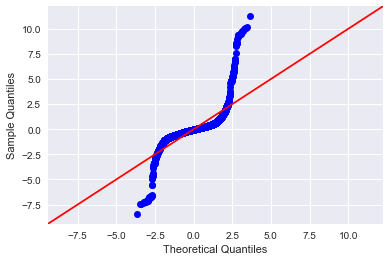

In [14]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)# Your code here - Check that the residuals are normally distributed

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [15]:

# for col in new_features:
#     fig = plt.figure(figsize=(15,8))
#     fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
#     plt.show();#Your code here - Check that the residuals are homoscedastic

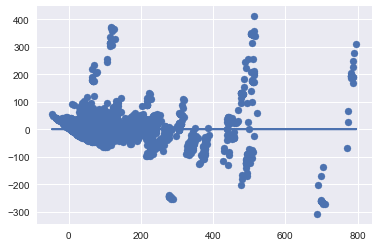

In [16]:
plt.scatter(model.predict(train[new_features]), model.resid)
plt.plot(model.predict(train[new_features]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [17]:
outlier = np.quantile(df.list_price, .99)

df_o = df = df[df.list_price < outlier]
train, test = train_test_split(df_o)


outcome = "list_price"
x_cols = feature_list
predictors = '+'.join(new_features)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()
model = ols(formula=formula, data=train).fit()
model.summary()#Your code here - Check for outliers

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     941.1
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:56:27   Log-Likelihood:                -37166.
No. Observations:                8069   AIC:                         7.445e+04
Df Residuals:                    8011   BIC:                         7.485e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6640      0.773     82.308      0.000      62.148      65.180
piece_count                                         65.1696      0.554    117.548      0.000      64.083      66.256
num_reviews                                          1.2799      0.427      3.001      0.003       0.444       2.116
play_star_rating                                     6.8068      0.364     18.679      0.000       6.093       7.521
star_rating                                         -2.4371      0.464     -5.253      0.000      -3.347      -1.528
val_star_rating                                     -7.5719      0.413    -18.345      0.000      -8.381      -6.763
ages_10_16                                           1.7616      2.487      0.708      0.479      -3.114       6.638
ages_11_16                                           6.0186      3.771      1.596      0.111      -1.374      13.411
ages_12_16                                         -23.0343      5.017     -4.591      0.000     -32.869     -13.200
ages_14_                                            35.9320      2.670     13.459      0.000      30.698      41.166
ages_2_5                                            14.8188      1.188     12.471      0.000      12.490      17.148
ages_5_12                                          -39.5099      1.746    -22.631      0.000     -42.932     -36.088
ages_6_                                            -34.1537      3.961     -8.622      0.000     -41.919     -26.388
ages_6_12                                          -20.1508      1.084    -18.586      0.000     -22.276     -18.025
ages_7_12                                          -16.0053      1.362    -11.755      0.000     -18.674     -13.336
ages_7_14                                          -14.8858      1.157    -12.869      0.000     -17.153     -12.618
ages_8_                                              0.4129      2.941      0.140      0.888      -5.353       6.178
ages_8_12                                          -12.7677      1.705     -7.487      0.000     -16.111      -9.425
ages_8_14                                           -7.7548      1.219     -6.360      0.000     -10.145      -5.364
ages_9_                                              5.8455      6.780      0.862      0.389      -7.446      19.137
ages_9_12                                          -20.3647      4.245     -4.798      0.000     -28.685     -12.044
ages_9_14                                            2.6933      1.700      1.584      0.113      -0.640       6.026
theme_name_BOOST                                   101.6344      6.695     15.180      0.000      88.510     114.759
theme_name_Blues_Helicopter_Pursuit      

In [18]:
df_o.list_price = np.log(df_o.list_price)

In [20]:
train, test = train_test_split(df_o)



predictors = '+'.join(new_features)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.7
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:56:36   Log-Likelihood:                -4942.2
No. Observations:                8069   AIC:                         1.000e+04
Df Residuals:                    8011   BIC:                         1.041e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4016      0.014    239.713      0.000       3.374       3.429
piece_count                                          0.6031      0.010     58.669      0.000       0.583       0.623
num_reviews                                         -0.0235      0.008     -3.091      0.002      -0.038      -0.009
play_star_rating                                     0.1279      0.007     18.744      0.000       0.115       0.141
star_rating                                         -0.0534      0.009     -6.269      0.000      -0.070      -0.037
val_star_rating                                     -0.1278      0.008    -16.853      0.000      -0.143      -0.113
ages_10_16                                           0.6411      0.045     14.133      0.000       0.552       0.730
ages_11_16                                           0.3104      0.070      4.413      0.000       0.173       0.448
ages_12_16                                           0.0950      0.082      1.160      0.246      -0.066       0.256
ages_14_                                             0.5627      0.049     11.404      0.000       0.466       0.659
ages_2_5                                             0.4732      0.022     21.410      0.000       0.430       0.517
ages_5_12                                           -0.7232      0.032    -22.359      0.000      -0.787      -0.660
ages_6_                                             -0.8973      0.069    -12.962      0.000      -1.033      -0.762
ages_6_12                                           -0.1458      0.020     -7.241      0.000      -0.185      -0.106
ages_7_12                                            0.1162      0.025      4.626      0.000       0.067       0.165
ages_7_14                                            0.0266      0.021      1.258      0.208      -0.015       0.068
ages_8_                                              0.5694      0.056     10.239      0.000       0.460       0.678
ages_8_12                                            0.2848      0.032      8.821      0.000       0.222       0.348
ages_8_14                                            0.4002      0.022     17.977      0.000       0.357       0.444
ages_9_                                              0.1141      0.122      0.932      0.352      -0.126       0.354
ages_9_12                                            0.3467      0.085      4.099      0.000       0.181       0.512
ages_9_14                                            0.5614      0.032     17.697      0.000       0.499       0.624
theme_name_BOOST                                     1.0034      0.119      8.399      0.000       0.769       1.238
theme_name_Blues_Helicopter_Pursuit      

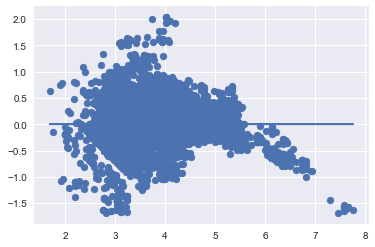

In [21]:
plt.scatter(model.predict(train[new_features]), model.resid)
plt.plot(model.predict(train[new_features]), [0 for i in range(len(train))])#Your code here - Rerun the model with extreme outliers removed

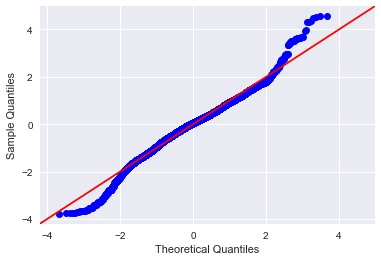

In [22]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)#Your code here - Check normality and homoscedasticity assumptions

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 